## Scraping Amazon Products - Focus on Today's Deals Data Analysis

### Load the data

In [150]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [151]:
# Load the data

Jumia_Deals = pd.read_csv('data/Jumia-Deals.csv')

Jumia_Deals_2 = pd.read_csv('data/Jumia-Deals-2.csv')

In [152]:
# Appending the dataframes

Jumia_Deals = pd.concat([Jumia_Deals, Jumia_Deals_2], ignore_index = True)

Jumia_Deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3918 non-null   object 
 1   Old Price      3509 non-null   float64
 2   New Price      3918 non-null   int64  
 3   Discount       3509 non-null   object 
 4   Rating         2993 non-null   float64
 5   Ratings Count  3744 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 183.8+ KB


In [153]:
# Inspect a few rows

Jumia_Deals.head()

,Product Name,Old Price,New Price,Discount,Rating,Ratings Count
0,AILYONS HD-199A Electric Dry Iron Box Silver &...,1399.0,929,34%,3.8,1398.0
1,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,NaN,618,NaN,3.6,2200.0
2,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,1300.0,975,25%,4.4,4409.0
3,RichRipple LED Display Bluetooth Headsets 9D S...,920.0,519,44%,3.7,703.0
4,AILYONS FK-0310 Stainless Steel 2.2L Electric ...,1599.0,902,44%,3.9,926.0


### Data Preprocessing

In [154]:
# Check for Duplicates

duplicateRows = Jumia_Deals[Jumia_Deals.duplicated()]

duplicateRows

,Product Name,Old Price,New Price,Discount,Rating,Ratings Count
480,Big White Round Mosquito Net For Single Bed-FR...,1500.0,879,41%,4.1,132.0
760,Superfoam Morning Glory Heavy Duty Quilted Mat...,NaN,842116842,NaN,4.3,95.0
1560,Shenke MOSQUITO REPELENT HEATER AND MAT.,1100.0,590,46%,4.3,43.0
1972,Line One 100% Whey Protein Mass Gainer Double ...,5500.0,2849,48%,4.3,74.0
1983,"Mini Portable Electric Fascia Gun, Neck And Ba...",2762.0,1920,30%,4.8,24.0
...,...,...,...,...,...,...
3907,Beard Oil 100% Natural Beard Growth & Moustach...,1300.0,585,55%,NaN,NaN
3909,Healthy weight Scale Body Scales Weighing Mete...,1500.0,1200,20%,NaN,20.0
3910,Fashion Men's Printed T-shirt Slim Fit - Blue,1100.0,580,47%,3.5,40.0
3912,Fk 5000W Smart High Power Professional Hair Bl...,1500.0,1449,3%,3.7,55.0


In [155]:
# Drop duplicates

Jumia_Deals.drop_duplicates()

,Product Name,Old Price,New Price,Discount,Rating,Ratings Count
0,AILYONS HD-199A Electric Dry Iron Box Silver &...,1399.0,929,34%,3.8,1398.0
1,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,NaN,618,NaN,3.6,2200.0
2,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,1300.0,975,25%,4.4,4409.0
3,RichRipple LED Display Bluetooth Headsets 9D S...,920.0,519,44%,3.7,703.0
4,AILYONS FK-0310 Stainless Steel 2.2L Electric ...,1599.0,902,44%,3.9,926.0
...,...,...,...,...,...,...
3911,Mara Ashwagandha Root Powder 100g,1200.0,800,33%,4.3,146.0
3913,Smart Wireless Keyboard With Touch Pad For Sma...,2000.0,1137,43%,4.5,39.0
3914,Qi Solar Powerbank 36000mah,6500.0,4811,26%,4.2,39.0
3915,BB Clear 5in1 Lightening Eclaircissant AntiDar...,1500.0,899,40%,4.8,4.0


In [156]:
# Remove the '%' sign and convert 'Discount' to numeric
Jumia_Deals['Discount'] = Jumia_Deals['Discount'].str.replace('%', '', regex = False).astype(float)

Jumia_Deals.head()

,Product Name,Old Price,New Price,Discount,Rating,Ratings Count
0,AILYONS HD-199A Electric Dry Iron Box Silver &...,1399.0,929,34.0,3.8,1398.0
1,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,NaN,618,NaN,3.6,2200.0
2,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,1300.0,975,25.0,4.4,4409.0
3,RichRipple LED Display Bluetooth Headsets 9D S...,920.0,519,44.0,3.7,703.0
4,AILYONS FK-0310 Stainless Steel 2.2L Electric ...,1599.0,902,44.0,3.9,926.0


In [157]:
# Missing values

Jumia_Deals.isnull().sum()

Product Name       0
Old Price        409
New Price          0
Discount         409
Rating           925
Ratings Count    174
dtype: int64

In [158]:
# Replacing Old Price with 0 and New Price with 0 in cases of NaN

def replace_nan_values(df, cols):
    for col in cols:
        df[col] = df[col].fillna(0)
    return df

Jumia_Deals = replace_nan_values(Jumia_Deals, ['Old Price', 'Rating', 'Discount', 'Ratings Count'])

Jumia_Deals.isnull().sum()

Product Name     0
Old Price        0
New Price        0
Discount         0
Rating           0
Ratings Count    0
dtype: int64

In [159]:
Jumia_Deals.head()

,Product Name,Old Price,New Price,Discount,Rating,Ratings Count
0,AILYONS HD-199A Electric Dry Iron Box Silver &...,1399.0,929,34.0,3.8,1398.0
1,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,0.0,618,0.0,3.6,2200.0
2,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,1300.0,975,25.0,4.4,4409.0
3,RichRipple LED Display Bluetooth Headsets 9D S...,920.0,519,44.0,3.7,703.0
4,AILYONS FK-0310 Stainless Steel 2.2L Electric ...,1599.0,902,44.0,3.9,926.0


In [160]:
Jumia_Deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3918 non-null   object 
 1   Old Price      3918 non-null   float64
 2   New Price      3918 non-null   int64  
 3   Discount       3918 non-null   float64
 4   Rating         3918 non-null   float64
 5   Ratings Count  3918 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 183.8+ KB


In [161]:
# Removing the .0

def clean_cols(df, cols):
    """
    Replaces '.0' in specified columns with an empty string after converting them to strings.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list of str): The list of column names to clean.
    
    Returns:
    pd.DataFrame: The DataFrame with cleaned columns.
    """
    for col in cols:
        df.loc[:, col] = df[col].astype(str).str.replace('\.0', '', regex = True)
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
    return df

Jumia_Deals = clean_cols(Jumia_Deals, ['Old Price', 'Discount', 'Ratings Count'])

Jumia_Deals.head()

,Product Name,Old Price,New Price,Discount,Rating,Ratings Count
0,AILYONS HD-199A Electric Dry Iron Box Silver &...,1399,929,34,3.8,1398
1,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,0,618,0,3.6,2200
2,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,1300,975,25,4.4,4409
3,RichRipple LED Display Bluetooth Headsets 9D S...,920,519,44,3.7,703
4,AILYONS FK-0310 Stainless Steel 2.2L Electric ...,1599,902,44,3.9,926


In [162]:
Jumia_Deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3918 non-null   object 
 1   Old Price      3918 non-null   int64  
 2   New Price      3918 non-null   int64  
 3   Discount       3918 non-null   int64  
 4   Rating         3918 non-null   float64
 5   Ratings Count  3918 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 183.8+ KB


### EDA

In [163]:
# Descriptive statistics table
descriptive_stats = Jumia_Deals.describe()

descriptive_stats

,Old Price,New Price,Discount,Rating,Ratings Count
count,3.918000e+03,3.918000e+03,3918.000000,3918.000000,3918.000000
mean,2.135409e+06,3.722663e+06,30.812660,3.158218,87.380041
std,2.813129e+07,5.619219e+07,16.729161,1.804974,275.064515
min,0.000000e+00,2.000000e+01,0.000000,0.000000,0.000000
25%,6.485000e+02,5.410000e+02,20.000000,3.100000,5.000000
50%,1.299000e+03,8.995000e+02,34.000000,4.100000,18.000000
75%,2.219000e+03,1.732750e+03,45.000000,4.400000,58.000000
max,8.579305e+08,2.429439e+09,92.000000,4.900000,5311.000000


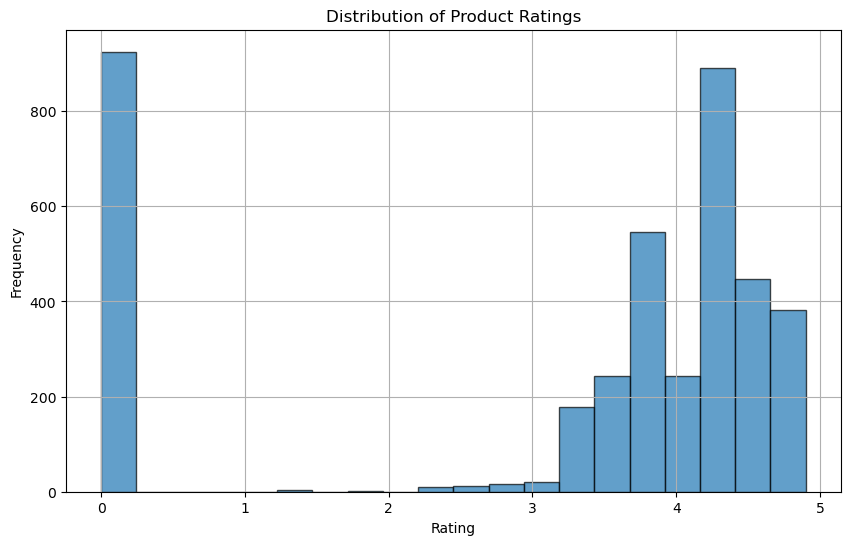

In [164]:
# Distribution of ratings
plt.figure(figsize = (10, 6))

plt.hist(Jumia_Deals['Rating'], bins = 20, edgecolor = 'k', alpha = 0.7)

plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

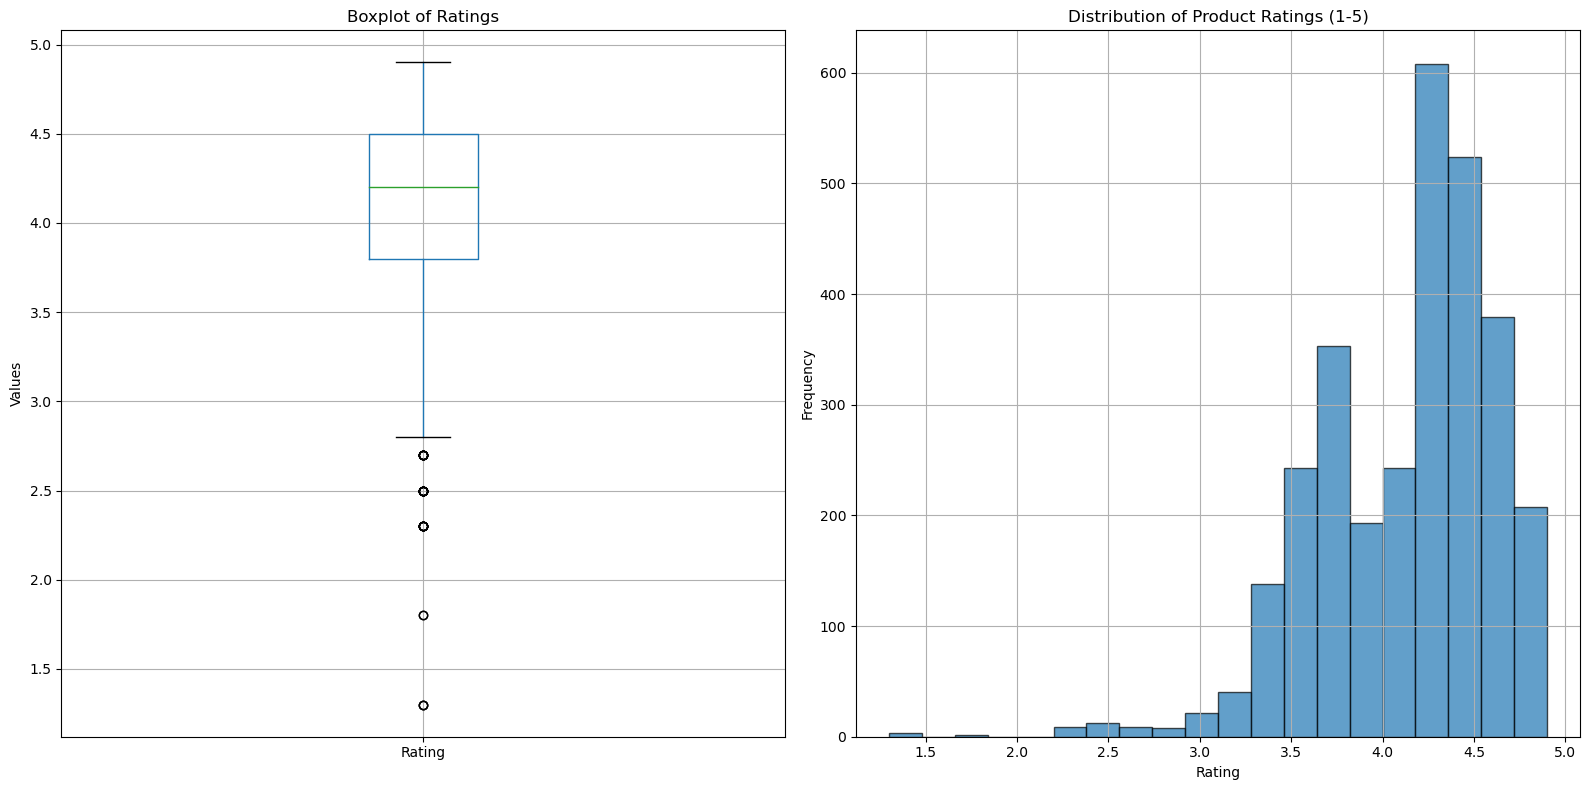

In [165]:
# Focusing on rated products, as 0 means the product was not rated

# Filter ratings between 1 and 5
filtered_df = Jumia_Deals[(Jumia_Deals['Rating'] >= 1) & (Jumia_Deals['Rating'] <= 5)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# Boxplot of ratings
filtered_df[['Rating']].boxplot(ax = axes[0])
axes[0].set_title('Boxplot of Ratings')
axes[0].set_ylabel('Values')
axes[0].grid(True)

# Distribution of ratings (1-5)
axes[1].hist(filtered_df['Rating'], bins = 20, edgecolor = 'k', alpha = 0.7)
axes[1].set_title('Distribution of Product Ratings (1-5)')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout()
plt.show()

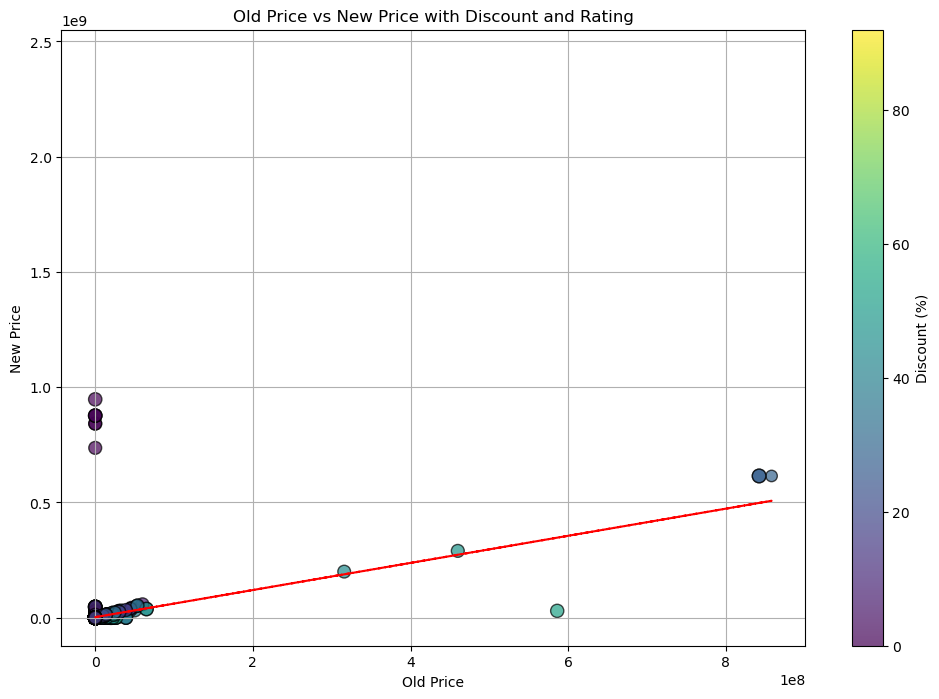

In [166]:
# Scatter plot of Old Price vs New Price
plt.figure(figsize=(12, 8))

# Scatter plot with color based on discount and marker size based on rating
scatter = plt.scatter(Jumia_Deals['Old Price'], Jumia_Deals['New Price'], 
                      c = Jumia_Deals['Discount'], s = Jumia_Deals['Rating']*20, 
                      alpha = 0.7, cmap = 'viridis', edgecolor = 'k')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Discount (%)')

# Add a trendline
z = np.polyfit(Jumia_Deals['Old Price'], Jumia_Deals['New Price'], 1)
p = np.poly1d(z)
plt.plot(Jumia_Deals['Old Price'], p(Jumia_Deals['Old Price']), "r--")

plt.title('Old Price vs New Price with Discount and Rating')
plt.xlabel('Old Price')
plt.ylabel('New Price')
plt.grid(True)
plt.show()

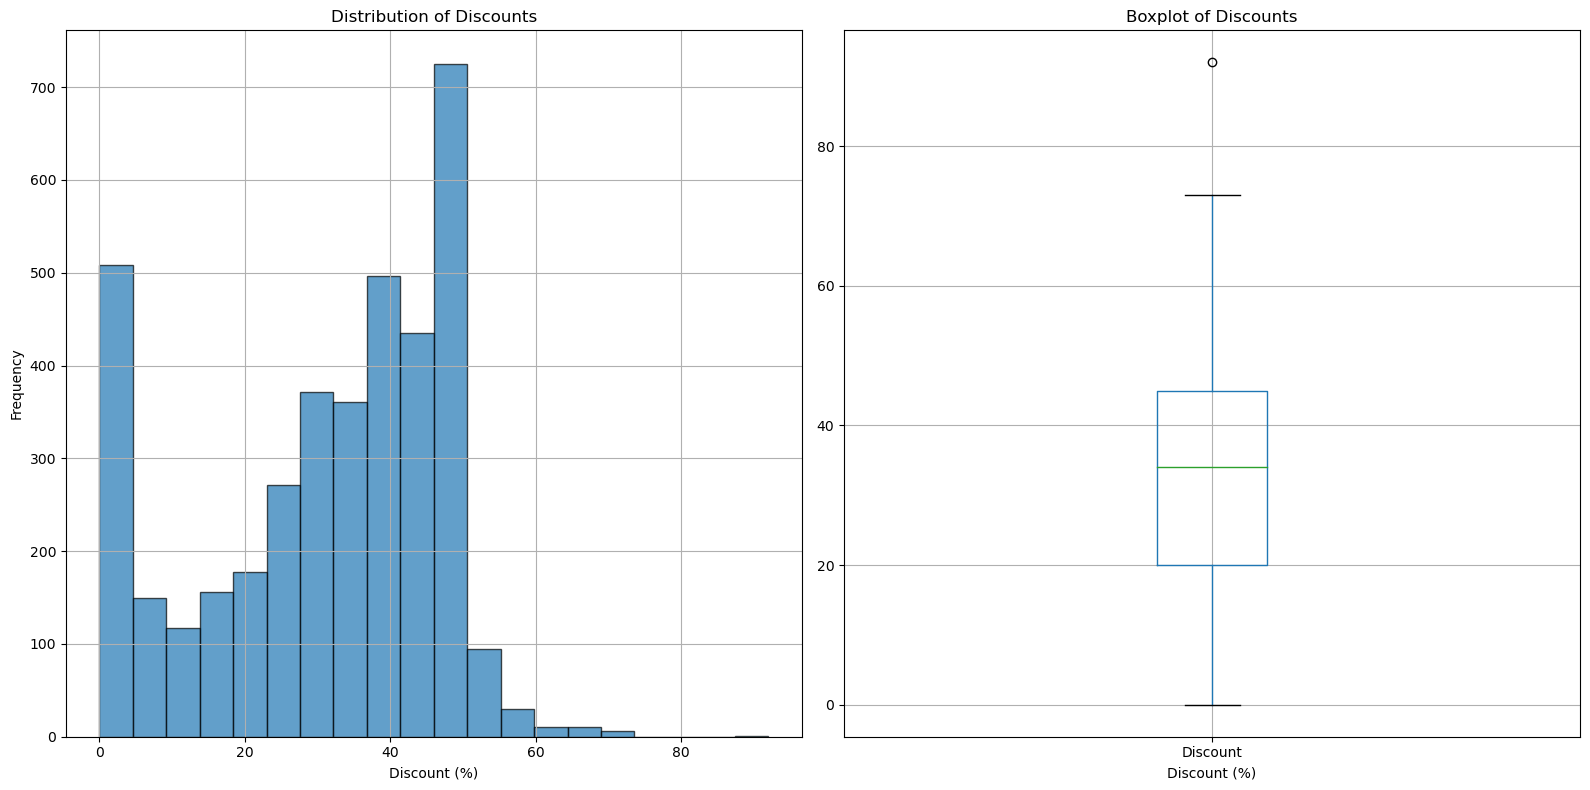

In [167]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# Distribution of Discounts
axes[0].hist(Jumia_Deals['Discount'], bins = 20, edgecolor = 'k', alpha = 0.7)
axes[0].set_title('Distribution of Discounts')
axes[0].set_xlabel('Discount (%)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Boxplot of discounts
Jumia_Deals[['Discount']].boxplot(ax = axes[1])
axes[1].set_title('Boxplot of Discounts')
axes[1].set_xlabel('Discount (%)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

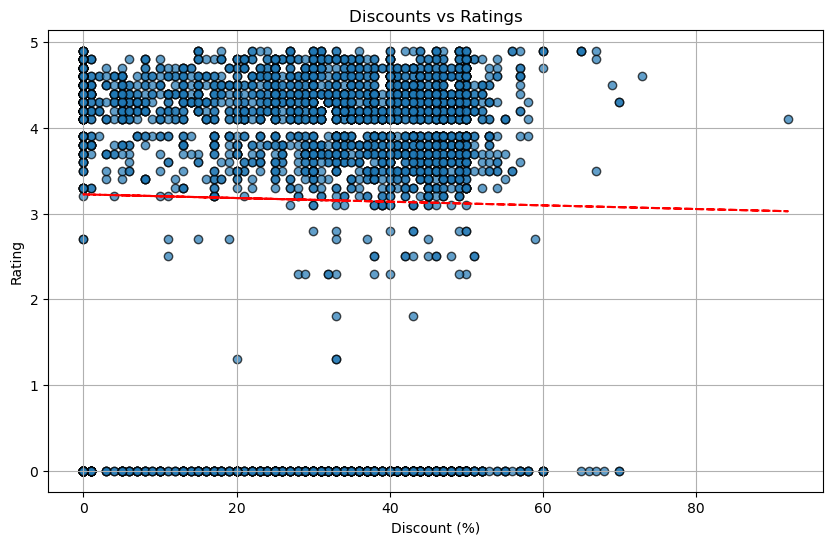

In [168]:
plt.figure(figsize = (10, 6))

plt.scatter(Jumia_Deals['Discount'], Jumia_Deals['Rating'], alpha = 0.7, edgecolor = 'k')

z = np.polyfit(Jumia_Deals['Discount'], Jumia_Deals['Rating'], 1)
p = np.poly1d(z)
plt.plot(Jumia_Deals['Discount'], p(Jumia_Deals['Discount']), "r--")

plt.title('Discounts vs Ratings')
plt.xlabel('Discount (%)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

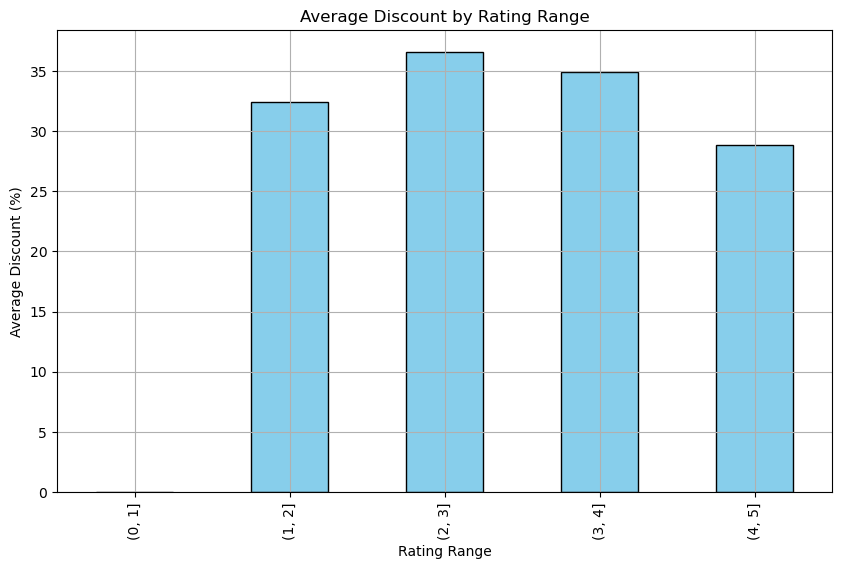

In [169]:
# Average Discount by Rating Range

# Rating ranges
rating_bins = [0, 1, 2, 3, 4, 5]

Jumia_Deals['Rating Range'] = pd.cut(Jumia_Deals['Rating'], bins = rating_bins)

# Average discount for each rating range
avg_discount_by_rating = Jumia_Deals.groupby('Rating Range')['Discount'].mean()

plt.figure(figsize = (10, 6))

avg_discount_by_rating.plot(kind = 'bar', color = 'skyblue', edgecolor = 'k')
plt.title('Average Discount by Rating Range')
plt.xlabel('Rating Range')
plt.ylabel('Average Discount (%)')
plt.grid(True)
plt.show()

In [170]:
# Top rated products

# Top 10 rated products ordered by rating
top_rated_products = Jumia_Deals.nlargest(10, 'Rating')

top_rated_products

,Product Name,Old Price,New Price,Discount,Rating,Ratings Count,Rating Range
293,Adidas Adilette Aqua Slides Unisex,4600,1999,57,4.9,26,"(4, 5]"
363,Fashion Men's Casual Shoes Waterproof Breathab...,2590,2190,15,4.9,17,"(4, 5]"
422,10-piece Stackable Stainless Steel Handle Prec...,900,660,27,4.9,52,"(4, 5]"
505,Fashion Sock Sneakers Stretch Knitted Women Br...,1500,899939,40,4.9,15,"(4, 5]"
692,Adidas Streetahead W Women Running Shoes,11008,3841,65,4.9,16,"(4, 5]"
845,Adidas Widewalk M Men Running Shoes,10112,3290,67,4.9,8,"(4, 5]"
908,Veet 5 In 1 Hair Removal Cream For Sensitive S...,1000,690,31,4.9,14,"(4, 5]"
939,Mouse Pad Relieve Stress Comfy EVA Wrist Suppo...,293,195,33,4.9,18,"(4, 5]"
1087,Fashion Jeans Designer Baseball Face Cap Hat- ...,1384,742,46,4.9,7,"(4, 5]"
1124,HIGH QUALITY STONE PAN,1990,1269,36,4.9,16,"(4, 5]"


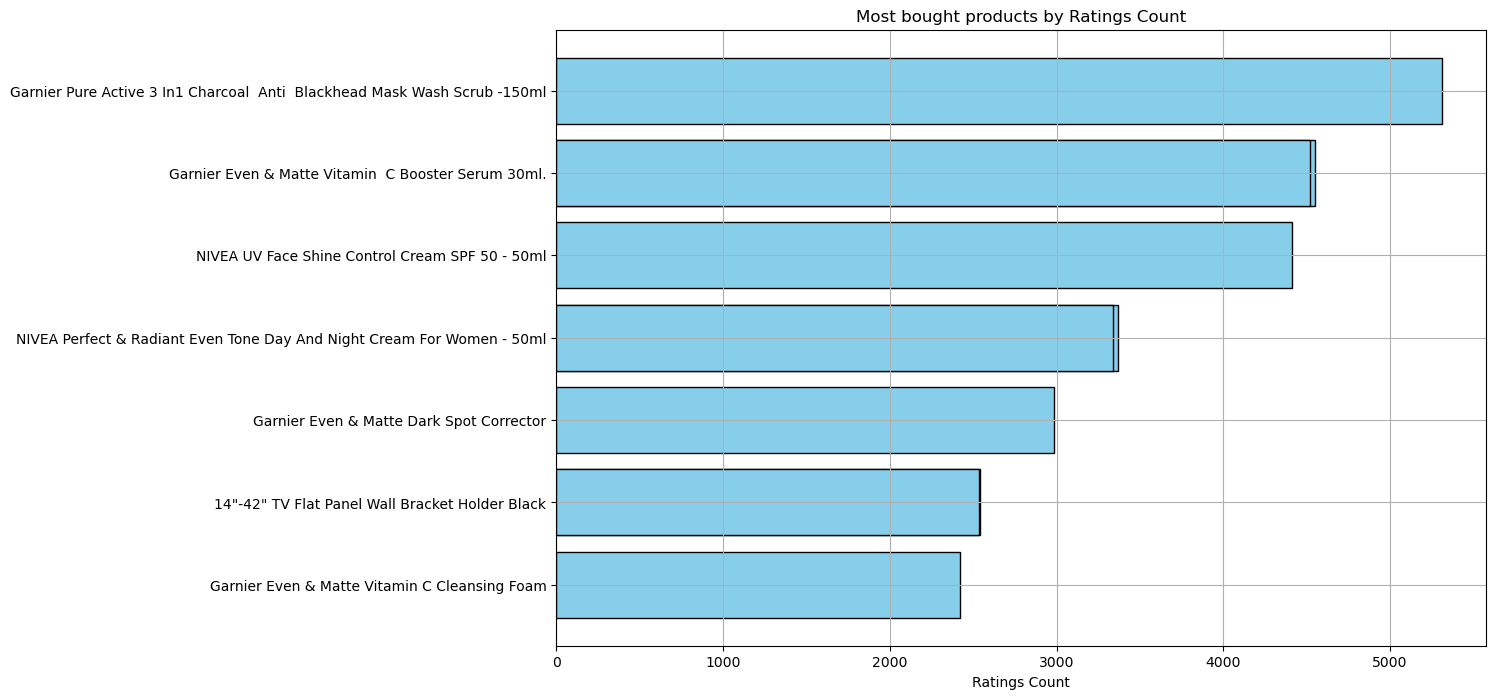

In [171]:
# Most bought products (ratings count)
most_bought_products = Jumia_Deals.nlargest(10, 'Ratings Count')

# Bar plot for top rated products
plt.figure(figsize = (12, 8))

plt.barh(most_bought_products['Product Name'], most_bought_products['Ratings Count'], color = 'skyblue', edgecolor = 'k')
plt.xlabel('Ratings Count')
plt.title('Most bought products by Ratings Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(True)
plt.show()

In [172]:
Jumia_Deals.to_csv('Jumia-DealsDF.csv', index=False)